# COMP 4211 Project

 this is the comp4211 (Spring 2019) project implemented by CHEN,Yifei and LI,Siqi
 Our project has two major parts: 
 1. Developing model of decision trees to determine the sentiment (positive or negative for the input review)
 2. Construct the model to predict the rating for an App

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# 1. Review sentiment predictor



# 1.1 Data preprocessing

As for the original dataset, lots of elements are flawed or unsuitable for further analysis. Therefore, 
we need to do some data clean and preprocessing

In [6]:
# For Reviews Dataset
# Reading data from CSV
review_data = pd.read_csv('googleplaystore_user_reviews.csv')
print(review_data.shape)
review_data.head(20) # briefly shows the orginal dataset

(64295, 5)


App                                  Translated_Review  \
0   10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1   10 Best Foods for You    This help eating healthy exercise regular basis   
2   10 Best Foods for You                                                NaN   
3   10 Best Foods for You         Works great especially going grocery store   
4   10 Best Foods for You                                       Best idea us   
5   10 Best Foods for You                                           Best way   
6   10 Best Foods for You                                            Amazing   
7   10 Best Foods for You                                                NaN   
8   10 Best Foods for You                               Looking forward app,   
9   10 Best Foods for You              It helpful site ! It help foods get !   
10  10 Best Foods for You                                          good you.   
11  10 Best Foods for You  Useful information The amount spelling errors ...   
12  10 Best Foods for You  Thank you! Great app!! Add arthritis, eyes, im...   
13  10 Best Foods for You  Greatest ever Completely awesome maintain heal...   
14  10 Best Foods for You  Good health...... Good health first priority.....   
15  10 Best Foods for You                                                NaN   
16  10 Best Foods for You  Health It's important world either life . thin...   
17  10 Best Foods for You  Mrs sunita bhati I thankful developers,to make...   
18  10 Best Foods for You  Very Useful in diabetes age 30. I need control...   
19  10 Best Foods for You                                 One greatest apps.   

   Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0   Positive            1.000000                0.533333  
1   Positive            0.250000                0.288462  
2        NaN                 NaN                     NaN  
3   Positive            0.400000                0.875000  
4   Positive            1.000000                0.300000  
5   Positive            1.000000                0.300000  
6   Positive            0.600000                0.900000  
7        NaN                 NaN                     NaN  
8    Neutral            0.000000                0.000000  
9    Neutral            0.000000                0.000000  
10  Positive            0.700000                0.600000  
11  Positive            0.200000                0.100000  
12  Positive            0.750000                0.875000  
13  Positive            0.992188                0.866667  
14  Positive            0.550000                0.511111  
15       NaN                 NaN                     NaN  
16  Positive            0.450000                1.000000  
17  Positive            0.600000                0.666667  
18  Positive            0.295000                0.100000  
19  Positive            1.000000                1.000000

In [7]:

# Draw out all the valid reviews and corresponding sentiments
review_data=pd.concat([review_data.Translated_Review,review_data.Sentiment],axis=1)
number_of_reviews = len(review_data.Sentiment)


for i in range(number_of_reviews):
    #print (review_data.Sentiment[i])
    if review_data.Sentiment[i] == 'Positive':
        review_data.Sentiment[i] = 0
    elif review_data.Sentiment[i] == 'Negative':
        review_data.Sentiment[i] = 2
    elif review_data.Sentiment[i] == 'Neutral':   # Neutral sentiment. label with 1 （middle）
        review_data.Sentiment[i] = 1

review_data.dropna(inplace=True)  # For drop nan values. It makes confuse for our model.
review_data.head(20)

Translated_Review Sentiment
0   I like eat delicious food. That's I'm cooking ...         0
1     This help eating healthy exercise regular basis         0
3          Works great especially going grocery store         0
4                                        Best idea us         0
5                                            Best way         0
6                                             Amazing         0
8                                Looking forward app,         1
9               It helpful site ! It help foods get !         1
10                                          good you.         0
11  Useful information The amount spelling errors ...         0
12  Thank you! Great app!! Add arthritis, eyes, im...         0
13  Greatest ever Completely awesome maintain heal...         0
14  Good health...... Good health first priority.....         0
16  Health It's important world either life . thin...         0
17  Mrs sunita bhati I thankful developers,to make...         0
18  Very Useful in diabetes age 30. I need control...         0
19                                 One greatest apps.         0
20                                          good nice         0
21                              Healthy Really helped         0
22                                         God health         1

In [8]:
# Normalize all the reviews:
# 1.delete !.''... : # and so on
# 2.Delete the words which are unnecessary, which are absoulte without sentiment
#      just like:  a  for are  the ... and so on
# 3.Break the sentence 
# 4.Lower case 
# 5.lemmatization

import re
import nltk
import nltk as nlp
from nltk.corpus import stopwords as stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

#length = review_data.shape[0]
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = stopwords.words('english')
#generate the processed review list 
#prepara for the futher input matrix 
review_list=[]
for i in review_data.Translated_Review:
    review=re.sub("[^a-zA-Z]"," ",i)
    review=review.lower()
    review=nltk.word_tokenize(review)
    review = [word for word in review if word not in stop_words]
    lemma=nlp.WordNetLemmatizer()
    review=[lemma.lemmatize(word) for word in review]
    review=" ".join(review)
    review_list.append(review)

print(review_list[:10])
print(len(review_list))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yifeichen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yifeichen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yifeichen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['like eat delicious food cooking food case best food help lot also best shelf life', 'help eating healthy exercise regular basis', 'work great especially going grocery store', 'best idea u', 'best way', 'amazing', 'looking forward app', 'helpful site help food get', 'good', 'useful information amount spelling error question validity information shared fixed star given']
37427


In [9]:
# Now the reviews have been preprocessed successfully
# And we need to use the review_list to select the feature set we need

from sklearn.feature_extraction.text import CountVectorizer
# I found that there are total 17577 unique words, it is not efficient 
# and time wasting for constructing the future decision tree 
#Therefore, i decide to set the max_features to be 2000
count_vectorizer=CountVectorizer(max_features= 2000)
#Get the matrix about # of apperance of words of each review,
input_map=count_vectorizer.fit_transform(review_list).toarray()
features_list=count_vectorizer.get_feature_names()
print(len(input_map[1,:])) # verify we select 2000 features (word)
#print(features_list)

2000


In [10]:
# Then, prepare the correct format of data for a decision tree
# Label vector
labels= review_data['Sentiment'].values[:]
review_labels=[]
for sentiment in review_data.Sentiment:
    review_labels.append(sentiment)

print(labels)
#print(review_labels)
print(len(review_labels)) # verify the number of labels equals the number of rows of input

[0 0 0 ... 2 0 2]
37427


**Now we are going to find a satisfactory model for classification of sentiment**
    
    optinal list:
    
    1. Decision Tree
    2. Decision Tree with Random Forest
    3. GBDT

In [14]:
# Data split
from sklearn.model_selection import train_test_split
review_train, review_test, label_train, label_test = train_test_split(input_map,review_labels,test_size=0.2,
                                                                       random_state=4211)

#print(xtrain )
#print ("height: %s.      width: %s " %(len(xtrain[:,1]), len(xtrain[1,:])))

# 1.2: Method 1: decision tree classification

In [15]:
# Method 1: decision tree classification

# define the decision treetraining, testing, and plot functions
from sklearn import tree
import matplotlib.pyplot as plt
import time

from sklearn import metrics

class decision_tree_classifier:
    def __init__(self,criterion,depth):
        self.cri = criterion
        self.dep = depth
        self.decision_tree = tree.DecisionTreeClassifier(criterion = criterion,max_depth = depth)
        print ("construct decision tree with criterion: %s   and max_depth: %s " %(criterion,depth))
        
    
    def train(self,text,label):
        text_train, text_val, label_train, label_val = train_test_split(text,label,test_size=0.2,random_state=4211)

        start_time_tree = time.time()
        self.decision_tree = self.decision_tree.fit(text_train,label_train)
        val_predict = self.decision_tree.predict(text_val)
        val_correct = 0
        for i in range (len(label_val)):
            if val_predict[i] == label_val[i]:
                val_correct +=1
        val_accuracy = float(val_correct)/len(label_val)
    
        time_cost = round(time.time()-start_time_tree , 3)
        print("decision tree training time: %s" %time_cost)
        print("decision tree validation accuracy: %s" %val_accuracy)
        
        self.confusion_matrix(val_predict,label_val,"validation")
        
        return (val_accuracy,time_cost)
    
    
    def test(self,text,label):
        predict = self.decision_tree.predict(text)
        n_corrects = 0
        for i in range (len(label)):
            if predict[i] == label[i]:
                n_corrects +=1
        accuracy = float(n_corrects)/len(label)
        print("decision tree test accuracy: %s" %accuracy)
        
        self.confusion_matrix(predict,label,"test")
        return accuracy
    
    
    def confusion_matrix(self,predict,true,val_or_test):
        confusion = metrics.confusion_matrix(true, predict)
        plt.figure()
        plt.imshow(confusion, interpolation='nearest', cmap='Pastel1')
        plt.title('Criterion:%s   Max_depth:%s   %s' %(self.cri,self.dep,val_or_test), size = 15)
        plt.colorbar()
        plt.ylabel('Actual label', size = 15)
        plt.xlabel('Predicted label', size = 15)
        tick_marks = np.arange(3)
        plt.xticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
        plt.yticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
        plt.tight_layout()
        width, height = confusion.shape
        for x in range(width):
            for y in range(height):
                plt.annotate(str(confusion[x][y]), xy=(y, x), 
                horizontalalignment='center',
                verticalalignment='center')

    
    
    
    
    
    
    
    

construct decision tree with criterion: entropy   and max_depth: 10 
decision tree training time: 11.798
decision tree validation accuracy: 0.6772416096176324
decision tree test accuracy: 0.6737910766764628

construct decision tree with criterion: entropy   and max_depth: 20 
decision tree training time: 18.145
decision tree validation accuracy: 0.7044581733177492
decision tree test accuracy: 0.7123964734170452

construct decision tree with criterion: entropy   and max_depth: 50 
decision tree training time: 30.943
decision tree validation accuracy: 0.8144932376022709
decision tree test accuracy: 0.8120491584290676

construct decision tree with criterion: entropy   and max_depth: 80 
decision tree training time: 33.473
decision tree validation accuracy: 0.8513942227416931
decision tree test accuracy: 0.8479829014159765

construct decision tree with criterion: entropy   and max_depth: 100 
decision tree training time: 36.406
decision tree validation accuracy: 0.8605777258306896
decision

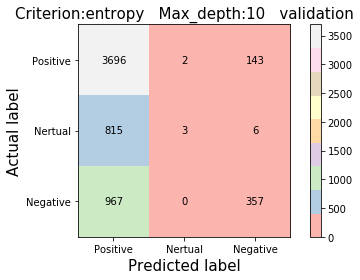

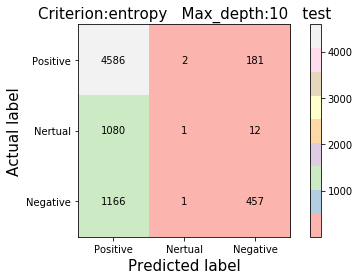

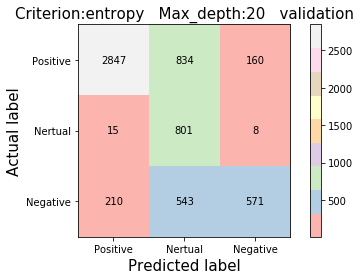

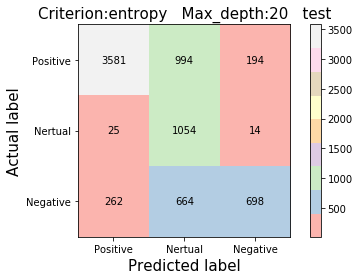

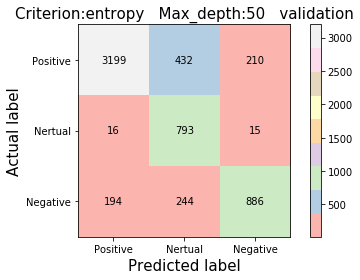

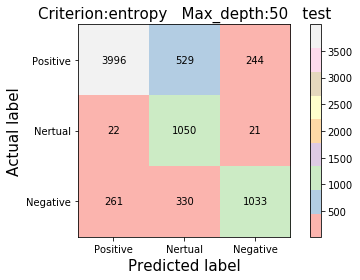

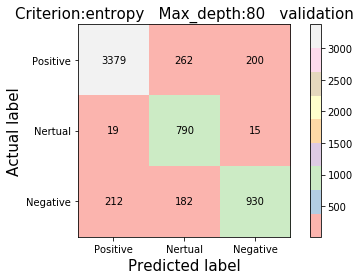

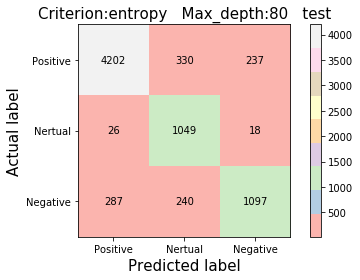

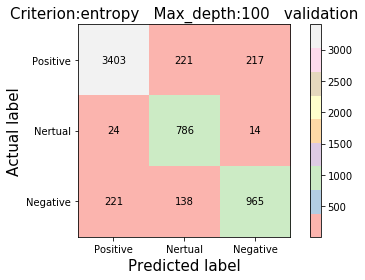

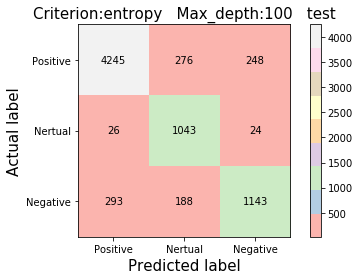

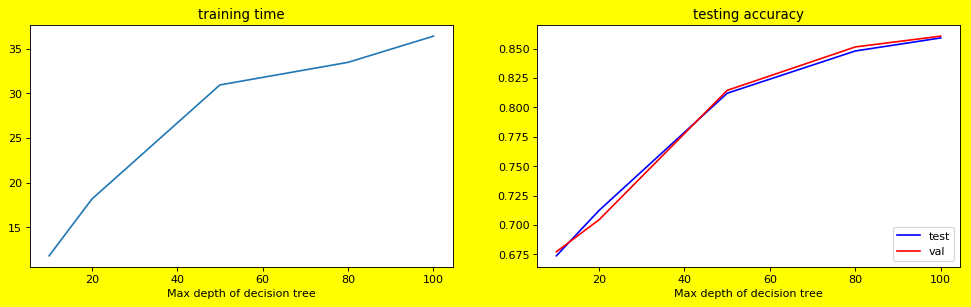

In [16]:
# Now I set different max_depth for the model and compare the result
depth_list = [10,20,50,80,100]
train_time_list = []
test_acc_list = []
val_acc_list = []

for i in range(len(depth_list)):
    decision_tree = decision_tree_classifier('entropy',depth_list[i])
    val_accuracy,time_cost = decision_tree.train(review_train,label_train)
    accuracy = decision_tree.test(review_test,label_test)
    
    val_acc_list.append(val_accuracy)
    train_time_list.append(time_cost)
    test_acc_list.append(accuracy)
    print()

plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='yellow')
plt.subplot(1,2,1)
plt.plot(depth_list,train_time_list)
plt.title("training time")
plt.xlabel("Max depth of decision tree")

plt.subplot(1,2,2)
l1, = plt.plot(depth_list,test_acc_list,color = 'b',label='test')
l2, = plt.plot(depth_list,val_acc_list,color = 'r',label='val')
plt.legend(handles=[l1, l2], labels=['test', 'val'],loc='lower right')
plt.title("testing accuracy")
plt.xlabel("Max depth of decision tree")

plt.show()

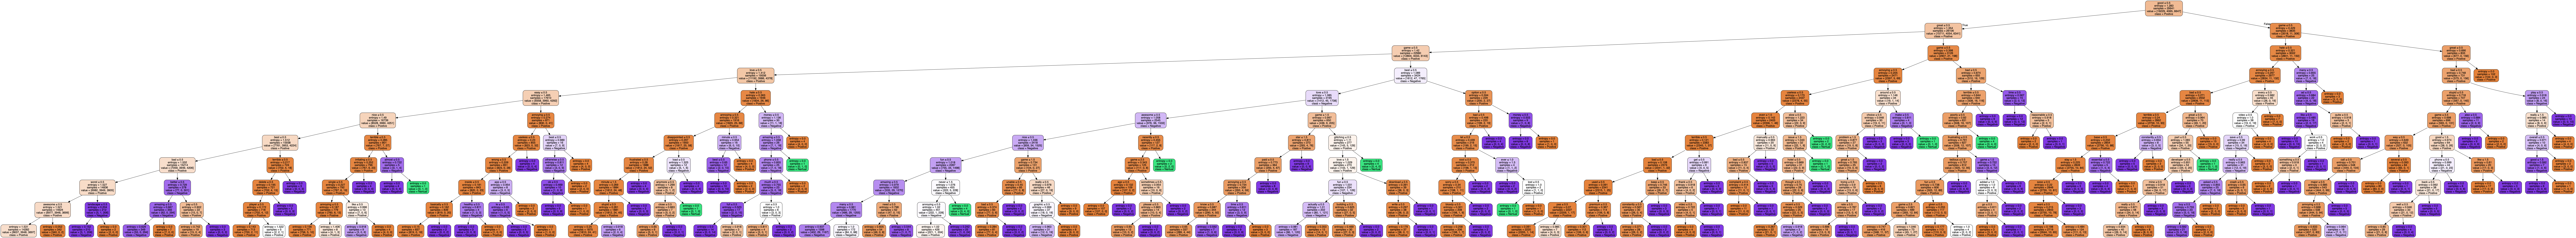

In [18]:
# a sample of visualization 
# need the library graphviz, which may not be installed in other computers
from IPython.display import Image  
import pydotplus

decision_tree_visual = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 10)
decision_tree_visual.fit(review_train,label_train)
dot_data = tree.export_graphviz(decision_tree_visual, out_file=None, 
                         feature_names=features_list,  
                         class_names=["Postive","Nertual","Negative"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# 1.3: Method 2 : Random Forest

In [19]:
# Now i consider the second method: Decision tree with random forest
# the core idea of RandomForest is to compare and get the result from multiple decision trees
# it will definitly cost more time than a single tree, i want to see is the result significantly better than a single tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn import cross_validation, metrics


param_set= [{'n_estimators': [50], 'max_depth':[10]},
            {'n_estimators': [100], 'max_depth':[10]},
            {'n_estimators': [150], 'max_depth':[10]},
            {'n_estimators': [50], 'max_depth':[20]},
            {'n_estimators': [100], 'max_depth':[20]},
            {'n_estimators': [150], 'max_depth':[20]},
            {'n_estimators': [50], 'max_depth':[50]},
            {'n_estimators': [100], 'max_depth':[50]},
            {'n_estimators': [150], 'max_depth':[50]},
            {'n_estimators': [100], 'max_depth':[100]}]

random_forest = RandomForestClassifier(criterion = 'gini',n_jobs = 5)
gsearch1= GridSearchCV(random_forest,param_set,cv = 5)

gsearch1.fit(review_train,label_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=5,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [50], 'max_depth': [10]}, {'n_estimators': [100], 'max_depth': [10]}, {'n_estimators': [150], 'max_depth': [10]}, {'n_estimators': [50], 'max_depth': [20]}, {'n_estimators': [100], 'max_depth': [20]}, {'n_estimators': [150], 'max_depth': [20]}, {'n_estimators': [50], 'max_depth': [50]}, {'n_estimators': [100], 'max_depth': [50]}, {'n_estimators': [150], 'max_depth': [50]}, {'n_estimators': [100], 'max_depth': [100]}]

In [20]:
print("Grid scores on for parameters set:")
print()
means = gsearch1.cv_results_['mean_test_score']
#average = average + clf3.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()
print("Best parameters set found:")
print(gsearch1.best_params_)


Grid scores on for parameters set:

0.647 (+/-0.002) for {'max_depth': 10, 'n_estimators': 50}
0.647 (+/-0.002) for {'max_depth': 10, 'n_estimators': 100}
0.645 (+/-0.001) for {'max_depth': 10, 'n_estimators': 150}
0.690 (+/-0.014) for {'max_depth': 20, 'n_estimators': 50}
0.689 (+/-0.008) for {'max_depth': 20, 'n_estimators': 100}
0.692 (+/-0.007) for {'max_depth': 20, 'n_estimators': 150}
0.776 (+/-0.007) for {'max_depth': 50, 'n_estimators': 50}
0.776 (+/-0.006) for {'max_depth': 50, 'n_estimators': 100}
0.777 (+/-0.010) for {'max_depth': 50, 'n_estimators': 150}
0.887 (+/-0.007) for {'max_depth': 100, 'n_estimators': 100}

Best parameters set found:
{'max_depth': 100, 'n_estimators': 100}


Random forest training time with optimal parameters set found: 90.068
Random forest test accuracy with optimal parameters set found: 0.8982099919850387


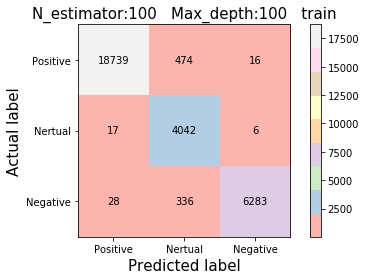

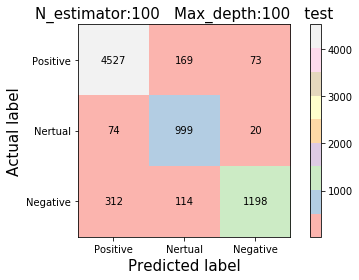

In [21]:
random_forest_1 = RandomForestClassifier(criterion = 'entropy',
                                         n_estimators=gsearch1.best_params_['n_estimators'],
                                         max_depth=gsearch1.best_params_['max_depth'])
start_time_1 = time.time()
random_forest_1.fit(review_train,label_train)
time_cost_1 = round(time.time()-start_time_1,3)
print("Random forest training time with optimal parameters set found: %s" %time_cost_1)

predict_1 = random_forest_1.predict(review_test)
n_corrects = 0
for i in range (len(label_test)):
    if predict_1[i] == label_test[i]:
        n_corrects +=1
accuracy = float(n_corrects)/len(label_test)
print("Random forest test accuracy with optimal parameters set found: %s" %accuracy)
 

    
    
# Confusion matrix
#train dataset
predict_train = random_forest_1.predict(review_train)
confusion_train = metrics.confusion_matrix(label_train, predict_train)
plt.figure()
plt.imshow(confusion_train, interpolation='nearest', cmap='Pastel1')
plt.title('N_estimator:%s   Max_depth:%s   %s' %(gsearch1.best_params_['n_estimators'],
                                                 gsearch1.best_params_['max_depth'],
                                                 "train"), size = 15)
plt.colorbar()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
tick_marks = np.arange(3)
plt.xticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.yticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.tight_layout()
width, height = confusion_train.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion_train[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

#test dataset
confusion_test = metrics.confusion_matrix(label_test, predict_1)
plt.figure()
plt.imshow(confusion_test, interpolation='nearest', cmap='Pastel1')
plt.title('N_estimator:%s   Max_depth:%s   %s' %(gsearch1.best_params_['n_estimators'],
                                                 gsearch1.best_params_['max_depth'],
                                                 "test"), size = 15)
plt.colorbar()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
tick_marks = np.arange(3)
plt.xticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.yticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.tight_layout()
width, height = confusion_test.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion_test[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

# 1.4 Method 3: GBDT Classification

In [22]:
# Method 3 GBDT Classification
from sklearn.ensemble import GradientBoostingClassifier

'''
param_set_gbdt= [{'n_estimators': [20], 'max_depth':[20],'learning_rate':[0.1]},
                {'n_estimators': [30], 'max_depth':[20],'learning_rate':[0.1]},
                {'n_estimators': [40], 'max_depth':[20],'learning_rate':[0.1]},
                {'n_estimators': [20], 'max_depth':[50],'learning_rate':[0.1]},
                {'n_estimators': [30], 'max_depth':[50],'learning_rate':[0.1]},
                {'n_estimators': [40], 'max_depth':[50],'learning_rate':[0.1]},
                {'n_estimators': [20], 'max_depth':[20],'learning_rate':[0.05]},
                {'n_estimators': [30], 'max_depth':[20],'learning_rate':[0.05]},
                {'n_estimators': [40], 'max_depth':[20],'learning_rate':[0.05]},
                {'n_estimators': [20], 'max_depth':[50],'learning_rate':[0.05]},
                {'n_estimators': [30], 'max_depth':[50],'learning_rate':[0.05]},
                {'n_estimators': [40], 'max_depth':[50],'learning_rate':[0.05]}]
'''

# since i find that the gbdt cost lots of time, i decide to choose a much easier set
param_set_gbdt= [{'n_estimators': [10], 'max_depth':[5],'learning_rate':[0.1]},
                {'n_estimators': [20], 'max_depth':[5],'learning_rate':[0.1]},
                {'n_estimators': [10], 'max_depth':[10],'learning_rate':[0.1]},
                {'n_estimators': [20], 'max_depth':[10],'learning_rate':[0.1]}]
gbdt = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse',
                                  random_state = 4211,max_features='sqrt',
                                  subsample=0.6 ,  min_samples_leaf=40,min_samples_split = 80)
gsearch2= GridSearchCV(gbdt,param_set_gbdt,cv = 5)

gsearch2.fit(review_train,label_train)

# max_features='sqrt'  subsample=0.8   min_samples_leaf=20 


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_sa...      subsample=0.6, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10], 'max_depth': [5], 'learning_rate': [0.1]}, {'n_estimators': [20], 'max_depth': [5], 'learning_rate': [0.1]}, {'n_estimators': [10], 'max_depth': [10], 'learning_rate': [0.1]}, {'n_estimators': [20], 'max_depth': [10], 'learning_rate': [0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
'''
gdbt_2 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse',random_state = 4211,
                                    max_features = "auto",#n_jobs = 3,
                                    n_estimators= 3,
                                    max_depth= 10,
                                   learning_rate = 0.1)
gdbt_2.fit(review_train,label_train)
'''

'\ngdbt_2 = GradientBoostingClassifier(loss=\'deviance\',criterion=\'friedman_mse\',random_state = 4211,\n                                    max_features = "auto",#n_jobs = 3,\n                                    n_estimators= 3,\n                                    max_depth= 10,\n                                   learning_rate = 0.1)\ngdbt_2.fit(review_train,label_train)\n'

In [24]:
'''
predict_try = gdbt_2.predict(review_test)
n_corrects = 0
for i in range (len(label_test)):
    if predict_try[i] == label_test[i]:
        n_corrects +=1
accuracy = float(n_corrects)/len(label_test)
print("GBDT with optimal parameters set found: %s" %accuracy)
'''
 

'\npredict_try = gdbt_2.predict(review_test)\nn_corrects = 0\nfor i in range (len(label_test)):\n    if predict_try[i] == label_test[i]:\n        n_corrects +=1\naccuracy = float(n_corrects)/len(label_test)\nprint("GBDT with optimal parameters set found: %s" %accuracy)\n'

In [25]:
print("Grid scores on for parameters set:")
print()
means = gsearch2.cv_results_['mean_test_score']
#average = average + clf3.cv_results_['mean_test_score']
stds = gsearch2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()
print("Best parameters set found:")
print(gsearch2.best_params_)


Grid scores on for parameters set:

0.643 (+/-0.002) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10}
0.649 (+/-0.003) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20}
0.654 (+/-0.011) for {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10}
0.678 (+/-0.018) for {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 20}

Best parameters set found:
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 20}


GBDT training time with optimal parameters set found: 656.656
GBDT with optimal parameters set found: 0.734304034197168


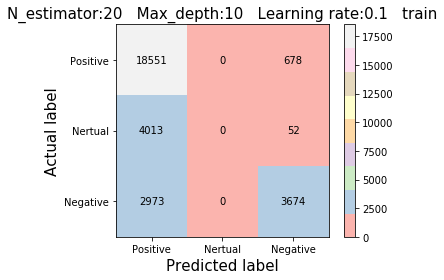

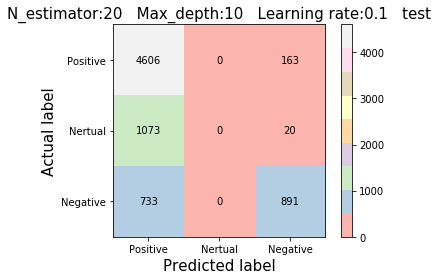

In [26]:
gdbt_1 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse',random_state = 4211,
                                    n_estimators=gsearch2.best_params_['n_estimators'],
                                    max_depth=gsearch2.best_params_['max_depth'],
                                   learning_rate = gsearch2.best_params_['learning_rate'],
                                   subsample=0.6 ,  min_samples_leaf=40,min_samples_split = 80 )
start_time_2 = time.time()
gdbt_1.fit(review_train,label_train)
time_cost_2 = round(time.time()-start_time_2,3)
print("GBDT training time with optimal parameters set found: %s" %time_cost_2)

predict_2 = gdbt_1.predict(review_test)
n_corrects = 0
for i in range (len(label_test)):
    if predict_2[i] == label_test[i]:
        n_corrects +=1
accuracy = float(n_corrects)/len(label_test)
print("GBDT with optimal parameters set found: %s" %accuracy)
 

    
    
# Confusion matrix
#train dataset
predict_train = gdbt_1.predict(review_train)
confusion_train = metrics.confusion_matrix(label_train, predict_train)
plt.figure()
plt.imshow(confusion_train, interpolation='nearest', cmap='Pastel1')
plt.title('N_estimator:%s   Max_depth:%s   Learning rate:%s   %s' %(gsearch2.best_params_['n_estimators'],
                                                                    gsearch2.best_params_['max_depth'],
                                                                    gsearch2.best_params_['learning_rate'],
                                                                    "train"), size = 15)
plt.colorbar()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
tick_marks = np.arange(3)
plt.xticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.yticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.tight_layout()
width, height = confusion_train.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion_train[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

#test dataset
#predict_train = gdbt_1.predict(review_train)
confusion_test = metrics.confusion_matrix(label_test, predict_2)
plt.figure()
plt.imshow(confusion_test, interpolation='nearest', cmap='Pastel1')
plt.title('N_estimator:%s   Max_depth:%s   Learning rate:%s   %s' %(gsearch2.best_params_['n_estimators'],
                                                                    gsearch2.best_params_['max_depth'],
                                                                    gsearch2.best_params_['learning_rate'],
                                                                    "test"), size = 15)
plt.colorbar()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
tick_marks = np.arange(3)
plt.xticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.yticks(tick_marks, ["Positive", "Nertual","Negative"], size = 10)
plt.tight_layout()
width, height = confusion_test.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion_test[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

# 2. Rating Predictor
Using the rating data set, we hope to generate a model to predict the rating of the game using the characteristics of it. 


In [25]:
import re
import sys
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets, linear_model
from sklearn.metrics import log_loss
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS
%matplotlib inline
# from impyute.imputation.cs import fast_knn


## 2.1 Preprocessing the data and dealing with the missing value

| Variables | Type | Explanation |
|-------|----------|------------------|
| App | string | Application name |
| Category | string |Category the app belongs to |
|Rating(Y)|decimal|Overall user rating of the app (as when scraped)|
|Reviews |integer |Number of user reviews for the app (as when scraped)|
| Size | string|Size of the app (as when scraped)|
|Installs|string|Number of user downloads/installs for the app (as when scraped)|
| Type |string|Paid or Free|
| Price|string|Price of the app (as when scraped)|
| Content Rating|string|Age group the app is targeted at - Children / Mature 21+ / Adult|
| Genres|string|An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres. |
| Last Updated |string|Date when the app was last updated on Play Store (as when scraped) |
| Current Ver|string|Current version of the app available on Play Store (as when scraped)|
| Android Ver|string|Min required Android version (as when scraped)|

### 2.1.1 Filling missing values

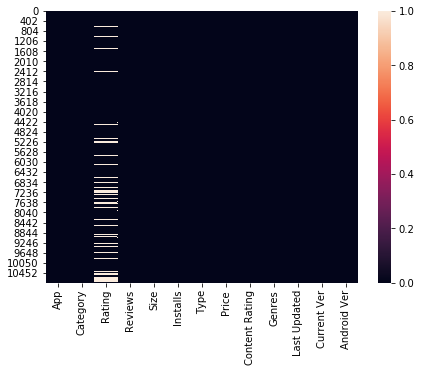

In [28]:
# load the data 
df = pd.read_csv('googleplaystore.csv')
df2 = pd.read_csv('googleplaystore.csv')

# Exploring missing data and checking if any has NaN values
plt.figure(figsize=(7, 5))
sns.heatmap(df.isnull())
# df.isnull().any()
# df.isnull().sum()


To deal with the missing data problem for the variables: rating, type, content ranking, current ver, andriod ver. We will use K-Fold to simulate the rating value of the missing ones. And we could use the median of the nearby group to replace with the NAN values.

In [29]:
# clean all non numerical values & unicode characters before the cleaning
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
# Because there are too many missing values for the variable, we consider several ways to deal with it
# 1.  Filling the rating with the median of all the APP
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
# df['Rating'] = df['Rating'].fillna(0.0)
# 2. Drop the value in the training part as the total data set is large enough

# Missing value of Current Ver
for i in replaces:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))
regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+'] 
for j in regex:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())

# Missing value of Current Ver
for i in replaces:
	df2['Current Ver'] = df2['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))
regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+'] 
for j in regex:
	df2['Current Ver'] = df2['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df2['Current Ver'] = df2['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df2['Current Ver'] = df2['Current Ver'].fillna(df2['Current Ver'].median())

# delete the remaining missing value
df.dropna(inplace = True)
df2.dropna(inplace = True)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

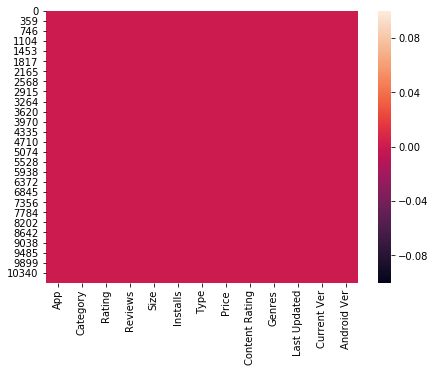

In [30]:
# Checking missing data 
plt.figure(figsize=(7, 5))
# sns.heatmap(df.isnull())
sns.heatmap(df2.isnull())
# df.isnull().any()
# df.isnull().sum()
df2.isnull().any()
df2.isnull().sum()

In [31]:
# # Check the record  of unreasonable value which is 1.9
# i = df[df['Category'] == '1.9'].index
# df.loc[i]
# print(df.loc[i])
# # # Drop this bad column
# # df = df.drop(i)

### 2.1.2 Transfer the type of the variables in to numerical ones

For the following steps, in order to process the data in the machine learning algorithms, we need to first convert it from strings to numbers. Below is the summarize of the varaibles and the operations that we have to conduct.

In [32]:
df.info()
df.head()

# Clean Rating
df['Rating'] = df['Rating'].astype(int).fillna(0)

# Categories: string -> integer -> dummies
# Cleaning Categories into integers
CateString = df["Category"]
cateVal = df["Category"].unique()
cateValCount = len(cateVal)
category_dict = {}
for i in range(0,cateValCount):
    category_dict[cateVal[i]] = i
df["CateCount"] = df["Category"].map(category_dict).astype(int)
df['CateCount'] = df['CateCount'].astype(int).fillna(0)

# Making the list for spliting training and test sets
cateList = df['Category'].unique().tolist() 
cateList = ['cate_' + word for word in cateList]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cate')], axis=1)

# transfer Size to integer
df['Size'].fillna(0, inplace=True)
# Convert kbytes to Mbytes 
k_indices = df['Size'].loc[df['Size'].str.contains('k',na=False)].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter
# delete "M" and change the "varies with device" to 0
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))
df[df['Size'] == 'Varies with device'] = '0'
df['Size'] = df['Size'].astype(float).fillna(0.0)

#Cleaning no of installs classification to the integer
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
df['Installs'] = df['Installs'].astype(int).fillna(0)

#Converting Type classification into binary
def cateype(types):
    if types == 'Free':
        return 0
    else:
        return 1
df['Type'] = df['Type'].map(cateype)

#Cleaning of content rating classification
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

#dropping of unrelated and unnecessary items
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

#Cleaning of genres
# count the number of the genres as genres_c
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genrescount'] = df['Genres'].map(GenresDict).astype(int)

#Cleaning prices dealing with $$$
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

# convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)

print("df")
df.info()
df.head()

import csv
w = csv.writer(open("output1.csv", "w"))
for key, val in df.items():
    w.writerow([key, val])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10837 entries, 0 to 10840
Data columns (total 13 columns):
App               10837 non-null object
Category          10837 non-null object
Rating            10837 non-null float64
Reviews           10837 non-null object
Size              10837 non-null object
Installs          10837 non-null object
Type              10837 non-null object
Price             10837 non-null object
Content Rating    10837 non-null object
Genres            10837 non-null object
Last Updated      10837 non-null object
Current Ver       10837 non-null float64
Android Ver       10837 non-null object
dtypes: float64(2), object(11)
memory usage: 1.2+ MB
df
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10837 entries, 0 to 10840
Data columns (total 44 columns):
Category                    10837 non-null object
Rating                      10837 non-null object
Reviews                     10837 non-null int32
Size                        10837 non-null float64
Inst

In [33]:
# Deal with df2
df2.info()
df2.head()
# We need to transfer categories
# Clean Rating

df2['Rating'] = df2['Rating'].astype(int).fillna(0)

# Categories: string -> integer -> dummies

# Cleaning Categories into integers
CateString = df2["Category"]
cateVal = df2["Category"].unique()
cateValCount = len(cateVal)
category_dict = {}
for i in range(0,cateValCount):
    category_dict[cateVal[i]] = i
df2["CateCount"] = df2["Category"].map(category_dict).astype(int)
df2['CateCount'] = df2['CateCount'].astype(int).fillna(0)

cateList = df2['Category'].unique().tolist() 
cateList = ['cate_' + word for word in cateList]
df2 = pd.concat([df2, pd.get_dummies(df2['Category'], prefix='cate')], axis=1)


# ?????????/clean size transfer Size to integer
# df['Size'] = df['Size'].astype(str).str.replace('\D+', '')
# delete M at the end of the string
# change the varies with device to 0
df2['Size'].fillna(0, inplace=True)
# Convert kbytes to Mbytes 
k_indices = df2['Size'].loc[df2['Size'].str.contains('k',na=False)].index.tolist()
converter = pd.DataFrame(df2.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df2.loc[k_indices,'Size'] = converter
# delete "M" and change the varies with device to 0
df2['Size'] = df2['Size'].apply(lambda x: x.strip('M'))

# df['Size'] = df['Size'].replace("M", "")
df2[df2['Size'] == 'Varies with device'] = '0'
df2['Size'] = df2['Size'].astype(float).fillna(0.0)

#Cleaning no of installs classification to the integer
# df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]
df2['Installs'] = df2['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
df2['Installs'] = df2['Installs'].astype(int).fillna(0)


#Converting Type classification into binary
def cateype(types):
    if types == 'Free':
        return 0
    else:
        return 1

df2['Type'] = df2['Type'].map(cateype)

#Cleaning of content rating classification
RatingL = df2['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df2['Content Rating'] = df2['Content Rating'].map(RatingDict).astype(int)

#dropping of unrelated and unnecessary items
df2.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

#Cleaning of genres
# count the number of the genres as genres_c
GenresL = df2.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df2['Genrescount'] = df2['Genres'].map(GenresDict).astype(int)

#Cleaning prices dealing with $$$
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df2['Price'] = df2['Price'].map(price_clean).astype(float)

# convert reviews to numeric
df2['Reviews'] = df2['Reviews'].astype(int)

# print("df2")
# df2.info()
# df2.head()

# # transfer Categories from integer to dummies because the number does not have the specific meaning.
# df2 = pd.get_dummies(df, columns=['Category'])

# print("df2")
# df2.info()
# df2.head()
import csv
w = csv.writer(open("output1.csv", "w"))
for key, val in df2.items():
    w.writerow([key, val])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9364 entries, 0 to 10840
Data columns (total 13 columns):
App               9364 non-null object
Category          9364 non-null object
Rating            9364 non-null float64
Reviews           9364 non-null object
Size              9364 non-null object
Installs          9364 non-null object
Type              9364 non-null object
Price             9364 non-null object
Content Rating    9364 non-null object
Genres            9364 non-null object
Last Updated      9364 non-null object
Current Ver       9364 non-null float64
Android Ver       9364 non-null object
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


## 2.2 Training the model to predict the rating

### 2.2.1 Split the data into training data and test data

In [34]:
#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genrescount'],axis = 1)
Y = df.Rating
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.20, random_state = 10)
# change the train_Y into int
train_Y = train_Y.astype(int)

X_2 = df2.drop(labels = ['Category','Rating','Genres','Genrescount'],axis = 1)
Y_2 = df2.Rating
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(X_2, Y_2, test_size=0.20, random_state = 10)
train_Y2 = train_Y2.astype(int)


### 2.2.2 Linear Regression Model

In [35]:
from sklearn import datasets, linear_model
# import time

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genrescount'],axis = 1)
Y = df.Rating
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.20, random_state = 10)
# define linear regression function
train_Y = train_Y.astype(int)

#start to calculate time
# t1 = time.process_time()

linear_model = linear_model.LinearRegression()
linear_model.fit(train_X,train_Y)
Results_linear = linear_model.predict(test_X)
accuracy_linear = linear_model.score(test_X,test_Y)
print(accuracy_linear)
print(linear_model.coef_)

#end of the counting time
# elapsed = (time.process_time() - t)


0.8909545779324055
[ 1.50095393e-08  4.04776442e-04 -1.00368831e-10  5.64456313e-02
 -8.52792123e-04  1.73335607e-04  1.77019458e-01  3.92565141e+00
  3.61221886e+00  3.56379021e+00  3.39633660e+00  3.18165777e+00
  2.91597366e+00  2.76091902e+00  2.45396653e+00  2.59238334e+00
  2.22738048e+00  2.34638672e+00  6.53794864e-01  1.83008306e+00
  1.64743068e+00  8.73540109e-01  1.55862330e+00  1.35762081e+00
  1.28975414e+00  9.53192024e-01 -2.04679535e+00  5.10878464e-01
 -1.65735618e+00 -1.01738305e+00 -6.24581691e-01 -7.50583416e-02
 -9.11517948e-01  2.17817112e-01  3.74920930e-01 -1.95027140e-01
 -7.15134488e-01 -4.85635995e-01 -1.65703228e+00 -1.26279713e+00]


In [36]:
from sklearn import datasets, linear_model
# import time

#Integer encoding
X_2 = df2.drop(labels = ['Category','Rating','Genres','Genrescount'],axis = 1)
Y_2 = df2.Rating
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(X_2, Y_2, test_size=0.20, random_state = 10)
# define linear regression function
train_Y2 = train_Y2.astype(int)

#start to calculate time
# t1 = time.process_time()

linear_model2 = linear_model.LinearRegression()
linear_model2.fit(train_X2,train_Y2)
Results_linear2 = linear_model2.predict(test_X2)
accuracy_linear2 = linear_model2.score(test_X2,test_Y2)
print(accuracy_linear2)
print(linear_model2.coef_)
#end of the counting time
# elapsed = (time.process_time() - t1)
# print(t1)

0.8895438549421302
[ 1.32047150e-08  9.57315902e-04  1.62036632e-11  6.49847289e-02
 -8.22135046e-04  2.15862994e-03  1.75212427e-01  3.93711052e+00
  3.65375638e+00  3.62417650e+00  3.34258626e+00  3.08019270e+00
  2.87869358e+00  2.73823847e+00  2.33950757e+00  2.59837083e+00
  2.26402765e+00  2.37100539e+00  6.63118082e-01  1.84486859e+00
  1.54567372e+00  8.78664008e-01  1.56672156e+00  1.32626721e+00
  1.24208863e+00  9.07304812e-01 -2.04944264e+00  4.59255172e-01
 -1.64986969e+00 -9.78979564e-01 -5.94404928e-01 -3.74283075e-02
 -9.21340102e-01  2.54165027e-01  4.12564411e-01 -2.06124415e-01
 -7.30563216e-01 -4.89426779e-01 -1.64892974e+00 -1.23270231e+00]


### 2.2.3 K-Nearest Neighbors Model¶


Accuracy: 89.59%


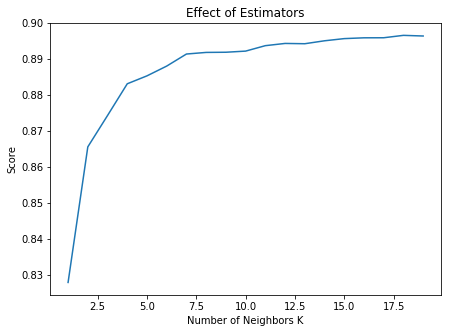

In [37]:
# Look at the 17 closest neighbors
KNN_model = KNeighborsRegressor(n_neighbors=17)
# # Find the mean accuracy of knn regression using X_test and y_test
KNN_model.fit(train_X, train_Y)

Results_KNN = KNN_model.predict(test_X)
accuracy_KNN = KNN_model.score(test_X,test_Y)
print('Accuracy: ' + str(np.round(accuracy_KNN*100, 2)) + '%')

# Calculate the mean accuracy of the KNN model

# accuracy_KNN = KNN_model.score(test_X,regression_test_Y)
# print('Accuracy: ' + str(np.round(accuracy*100, 2)) + '%')
# Try different numbers of n_estimators 
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    KNN_model.set_params(n_neighbors=n)
    KNN_model.fit(train_X, train_Y)
    scores.append(KNN_model.score(test_X,test_Y))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

Accuracy: 89.12%


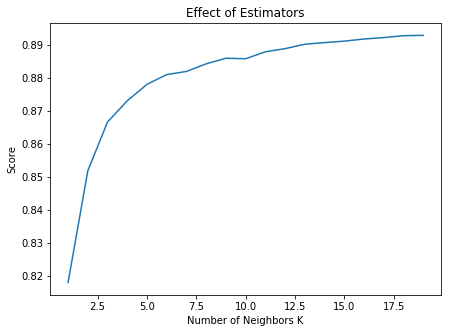

In [38]:
# Look at the 15 closest neighbors
KNN_model2 = KNeighborsRegressor(n_neighbors=15)
# t2 = time.process_time()
# Find the mean accuracy of knn regression using X_test and y_test
KNN_model2.fit(train_X2, train_Y2)

Results_KNN2 = KNN_model2.predict(test_X2)

# Calculate the mean accuracy of the KNN model
accuracy_KNN2 = KNN_model2.score(test_X2,test_Y2)
print('Accuracy: ' + str(np.round(accuracy_KNN2*100, 2)) + '%')
# elapsed = (time.process_time() - t)
# Try different numbers of n_estimators 
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    KNN_model2.set_params(n_neighbors=n)
    KNN_model2.fit(train_X2, train_Y2)
    scores.append(KNN_model2.score(test_X2,test_Y2))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

PS:
For genre label, we consider three ways to deal with them
1. to exclude genre and only use category.
2. to include genre as a set of dummies.
3. to introduce weights into different label. For example, we can add more weights, for example, $$ \beta=\frac{\sigma}{\Sigma(\sigma\beta+\alpha_1+\alpha_2...+\alpha_n)} $$; on the main category and less weights on the other genre, for example, $$ \alpha_i=\frac{1}{\Sigma(\sigma\beta+\alpha_1+\alpha_2...+\alpha_n)} $$.
But as we consider the parameter in the regression model could somehow reflect these weights, we could just use the second method to do the further analysis.